In [169]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Decision Tree

In [170]:
#abrimos el df con el balanceo SMOTE
df_balanceado = pd.read_csv ('datos\df_codificado_balanceado.csv', index_col=0)

In [171]:
#abrimos el df sin balancear
df_sin_balanceo = pd.read_csv ('datos\df_codificado_completo.csv', index_col=0)

## 1. Con el df balanceado mediante Smote.

In [172]:
# separamos los datos en X e y

X1 = df_balanceado.drop("Claim", axis = 1)
y1 = df_balanceado['Claim']


In [173]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [174]:
# creamos el objeto del modelo
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

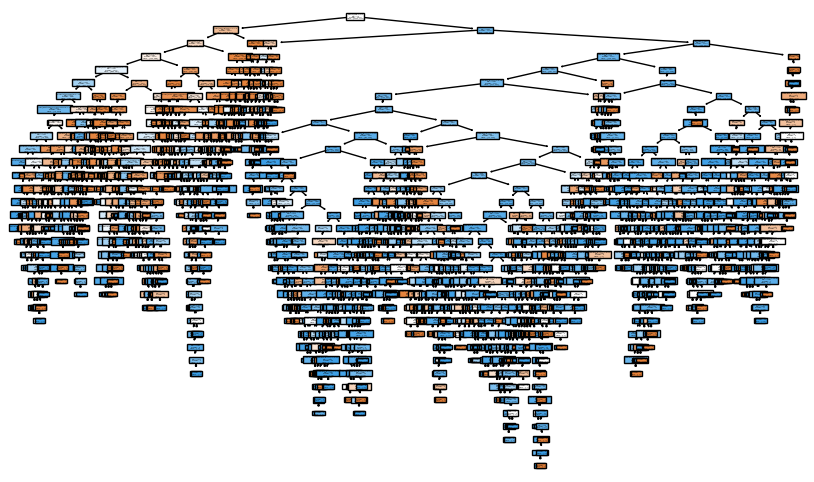

In [175]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

In [176]:
# max features. 

max_features = np.sqrt(len(x_train1.columns))
max_features

5.385164807134504

In [177]:
# max depth

print(arbol.tree_.max_depth)

34


In [178]:
#sacamos los parámetros que ha aplicado por defecto para poder tenerlo en cuenta para el RandomForest 
arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [179]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_balanceado = arbol.predict(x_test1)
y_pred_train_balanceado = arbol.predict(x_train1)

In [180]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(clases_reales_test, clases_predichas_test).ravel()
    especifidad_test = tn_test / (tn_test+fp_test)


    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(clases_reales_train, clases_predichas_train).ravel()
    especificad_train = tn_train / (tn_train+fp_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       'especifidad':[ especifidad_test,especificad_train ],
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [181]:
dt_results1 = metricas(y_test1, y_pred_test_balanceado, y_train1, y_pred_train_balanceado, "Decission Tree Balanceado")
dt_results1

,accuracy,precision,recall,especifidad,f1,kapppa,set,modelo
0,0.967029,0.959735,0.97489,0.959184,0.967253,0.934058,test,Decission Tree Balanceado
1,0.998125,0.998061,0.99819,0.998060,0.998126,0.996250,train,Decission Tree Balanceado


## 2. Con el df sin balancear

In [182]:
# separamos los datos en X e y

X2 = df_sin_balanceo.drop("Claim", axis = 1)
y2 = df_sin_balanceo['Claim']


In [183]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)


In [184]:
# creamos el objeto del modelo
arbol2 = DecisionTreeClassifier(random_state =0)

In [185]:
# ajustamos el modelo
arbol2.fit(x_train2, y_train2)

DecisionTreeClassifier(random_state=0)

In [186]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_sinbalanceo = arbol2.predict(x_test2)
y_pred_train_sinbalanceo = arbol2.predict(x_train2)


In [187]:
dt_results2 = metricas(y_test2, y_pred_test_sinbalanceo, y_train2, y_pred_train_sinbalanceo, "Decission Tree Sin Balanceo")
dt_results2

,accuracy,precision,recall,especifidad,f1,kapppa,set,modelo
0,0.973210,0.033333,0.045455,0.984276,0.038462,0.025203,test,Decission Tree Sin Balanceo
1,0.997633,1.000000,0.834375,1.000000,0.909710,0.908521,train,Decission Tree Sin Balanceo


## 3. Unión de los resultados de los dos modelos 

In [188]:
df_decision_results = pd.concat([dt_results2, dt_results1 ], axis = 0)
df_decision_results

,accuracy,precision,recall,especifidad,f1,kapppa,set,modelo
0,0.973210,0.033333,0.045455,0.984276,0.038462,0.025203,test,Decission Tree Sin Balanceo
1,0.997633,1.000000,0.834375,1.000000,0.909710,0.908521,train,Decission Tree Sin Balanceo
0,0.967029,0.959735,0.974890,0.959184,0.967253,0.934058,test,Decission Tree Balanceado
1,0.998125,0.998061,0.998190,0.998060,0.998126,0.996250,train,Decission Tree Balanceado


Después de comparar ambos resultados, se ve que es mejor el modelo primero, con el df balanceado con el método smote, por lo siguiente:

- En el balanceado, **accuracy** es cercana a un 1, es decir, que  acierta casi el 100%, tanto en el test como en el train.

- **Precision**(que es el porcentaje de aciertos postivos)  esta en un 0.95-0.99, test-train respectivamente, es decir acierta mucho en los que no reclaman.

- **Recall**, que recogería los falsos negativos y los los verdaderos positivos (es decir, los que  que sí iban a reclamar y no han reclamado y los que no han reclamado), sale un 0.97-0.99 (test-train). Identifica casi el 100%. 

- **F1** (la media entre precisión y recall), también está cerca del 1.

- La **especifidad**  sale con un 0.95-0.99.


- **Kappa** os explica si se está acerctando por azar o no, como está cerca del 1, está lejos de acertar por azar.

- Los valores de train y test son muy similares, por lo que no vemos **ni overfitting ni underfitting**.

In [189]:
#abrimos el cuadro de ayer para comparar la regresion con el decision tree
df_regresion= pd.read_csv("datos/resultados_logistica.csv", index_col=0)

In [190]:
resultados_todo = pd.concat([df_regresion, df_decision_results ], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo,especifidad
0,0.988212,0.000000,0.000000,0.000000,0.000000,test,Regresión logistica Sin Balanceo,NaN
1,0.985711,0.000000,0.000000,0.000000,0.000000,train,Regresión logistica Sin Balanceo,NaN
0,0.899793,0.865184,0.946932,0.904215,0.799606,test,Regresión logistica Balanceado,NaN
1,0.895002,0.858131,0.946545,0.900172,0.789999,train,Regresión logistica Balanceado,NaN
0,0.973210,0.033333,0.045455,0.038462,0.025203,test,Decission Tree Sin Balanceo,0.984276
1,0.997633,1.000000,0.834375,0.909710,0.908521,train,Decission Tree Sin Balanceo,1.000000
0,0.967029,0.959735,0.974890,0.967253,0.934058,test,Decission Tree Balanceado,0.959184
1,0.998125,0.998061,0.998190,0.998126,0.996250,train,Decission Tree Balanceado,0.998060


Después de ver todos los resultados en el cuadro, se puede comprobar que ambos modelos (logística y decision tree), si se aplican con el dataset sin balancear, dan resultados muy malos. Sin embargo, los resultados mejoran cuando los datasets estan balanceados y de ellos, el que mejor resultados da es el Decision Tree Balanceado.

*Nota: los 'NaN' aparecen porque en el cuadro de resultados de regresion logística no está incluida la 'especifidad', y en decision tree sí .*

In [191]:
#guardado
df_decision_results.to_csv ('datos/df_decision.csv')

In [192]:
#guardado
resultados_todo.to_csv ('datos/df_resultados_RL_DT.csv')